IndexError: index 7930 is out of bounds for axis 1 with size 7927

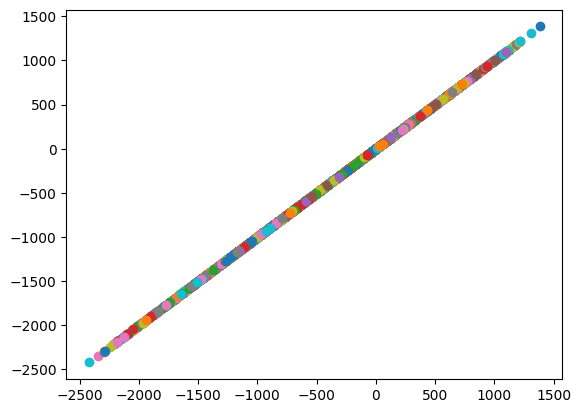

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def SVD(d,k=2):
    data=pd.read_csv(d)
    data=np.array(data)
    X=data[:,1:].T
    Y=np.array(data[:,0])
    digits=(0,6,9)
    digits=np.array(digits)
    listofind=[[] for _ in range(10)]
    for i in range(len(Y)): 
        listofind[Y[i]].append(i)  
    listofZ_k=[]
    print("now i draw")
    for i in digits:   
        X_i=X[:,listofind[i]]
        C_x=np.mean(X,1)
        C_x=np.expand_dims(C_x,axis=1)
        X_c=X_i-C_x
        for m in range(1):
            #C_x=np.mean()
            img=np.reshape(X_c[:,m],(28,28))
            U,s,VT=np.linalg.svd(img)
            A_k=np.zeros((28,28))
            for j in range(k):  
                A_k+= np.reshape(U[:,j],(28,1))@np.reshape(VT[j,:],(1,28))*s[j]
            A_k2=U[:,:k]@np.diag(s[:k])@VT[:k,:]
            U_k2,s_2,VT_2=np.linalg.svd(img[:k,:k])
            
            print(U_k2.shape,s_2.shape,VT_2.shape)
            A_k=np.reshape(A_k,(28,28))
           # plt.figure(figsize=(10, 4))
            plt.subplot(1, 3, 1)
            plt.imshow(img,cmap="gray")
            plt.subplot(1, 3, 2)
            plt.imshow(A_k,cmap="gray")
            plt.subplot(1, 3, 3)
            plt.imshow(A_k2,cmap="gray")
            
def SVD_2(filename,k,digits):
    data=pd.read_csv(filename)
    data=np.array(data)
    X=data[:,1:].T
    Y=np.array(data[:,0])
    #digits=np.linspace(0,9,10,dtype=int)
    digits=digits
    digits=np.array(digits)  
    listofind=[]
    for i in (range(len(Y))): 
        if(Y[i] in digits):
            listofind.append(i)             
    X_i=X[:,listofind]
    C_x=np.mean(X,1)
    C_x=np.expand_dims(C_x,axis=1)
    X_c=X_i-C_x
    U,s,V_t=np.linalg.svd(X_c)
    X_ck=U[:,:k]@np.diag(s[:k])@V_t[:k,:]
    Z_k=U[:,:k].T@X_c 
    for i in (listofind):
        plt.plot(Z_k[:,i],Z_k[:,i],"o",)
    plt.show()   
        
Z=SVD_2("data.csv",2,(0,5))
Z=SVD_2("data.csv",2,(0))
Z=SVD_2("data.csv",2,(5))
